<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



In [38]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/air_passengers.csv' , index_col='Month' , parse_dates=True)
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [40]:
df.isna().sum()

,0
Passengers,0


<Axes: xlabel='Month'>

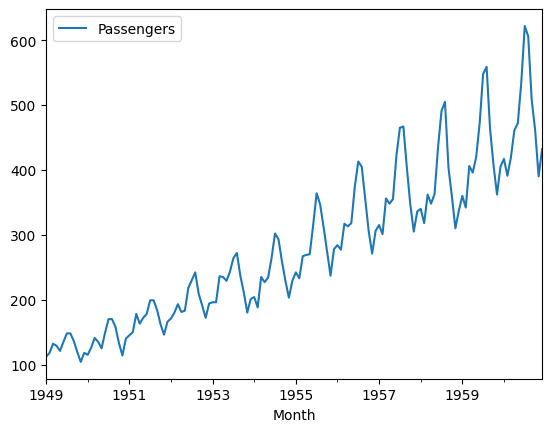

In [41]:
df.plot()

In [42]:
alpha=0.2

In [43]:
df['EWMA']=df['Passengers'].ewm(alpha=alpha,adjust=False).mean()

<Axes: xlabel='Month'>

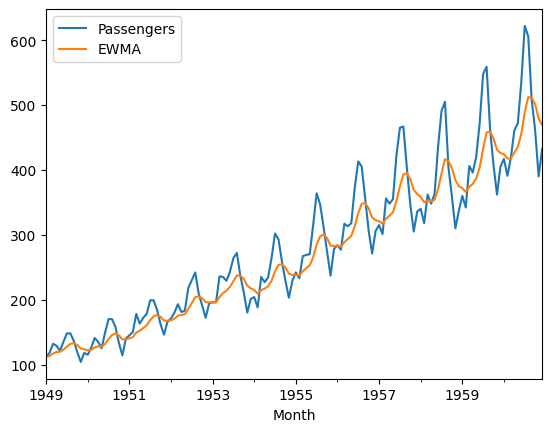

In [44]:
df.plot()

In [47]:
manual_ewma=[]
for x in df['Passengers'].to_numpy():
  if len(manual_ewma)>0:
    xhat=alpha*x+(1-alpha)*manual_ewma[-1]

  else:
    xhat=x
  manual_ewma.append(xhat)
df['Manual']=manual_ewma

<Axes: xlabel='Month'>

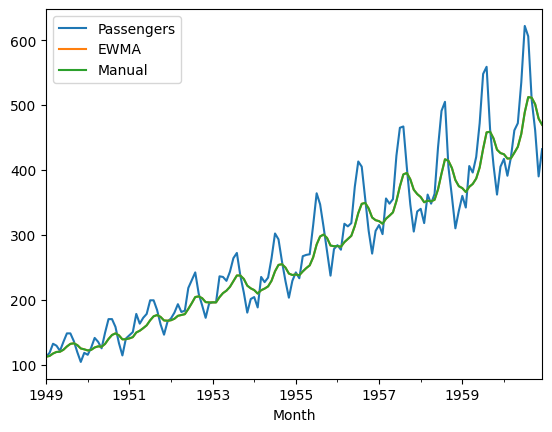

In [48]:
df.plot()

In [50]:
df.head()

,Passengers,EWMA,Manual
Month,,,
1949-01-01,112,112.0000,112.0000
1949-02-01,118,113.2000,113.2000
1949-03-01,132,116.9600,116.9600
1949-04-01,129,119.3680,119.3680
1949-05-01,121,119.6944,119.6944


In [52]:
df.drop('Manual', axis=1,inplace=True)

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [54]:
ses=SimpleExpSmoothing(df['Passengers'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
df.index_freq='MS'